In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

#import pandas_profiling
#from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [2]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

# EDA

In [3]:
df.head()

Activity Period Operating Airline Operating Airline IATA Code  \
0           200507      ATA Airlines                          TZ   
1           200507      ATA Airlines                          TZ   
2           200507      ATA Airlines                          TZ   
3           200507        Air Canada                          AC   
4           200507        Air Canada                          AC   

  Published Airline Published Airline IATA Code    GEO Summary GEO Region  \
0      ATA Airlines                          TZ       Domestic         US   
1      ATA Airlines                          TZ       Domestic         US   
2      ATA Airlines                          TZ       Domestic         US   
3        Air Canada                          AC  International     Canada   
4        Air Canada                          AC  International     Canada   

  Activity Type Code Price Category Code    Terminal Boarding Area  \
0           Deplaned            Low Fare  Terminal 1             B   
1           Enplaned            Low Fare  Terminal 1             B   
2     Thru / Transit            Low Fare  Terminal 1             B   
3           Deplaned               Other  Terminal 1             B   
4           Enplaned               Other  Terminal 1             B   

   Passenger Count  
0            27271  
1            29131  
2             5415  
3            35156  
4            34090

In [4]:
df.shape

(18885, 12)

In [5]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [10]:
df.sample(15)

Activity Period                     Operating Airline  \
17391           201709  Air Pacific Limited dba Fiji Airways   
4319            200808                             Air China   
4445            200809                             Air China   
3700            200802      United Airlines - Pre 07/01/2013   
3282            200711                           Horizon Air   
9958            201208                            US Airways   
16052           201611                         Swissport USA   
2323            200703                       British Airways   
4710            200811                     Frontier Airlines   
17882           201712                         Jazz Aviation   
11203           201307                    Southwest Airlines   
8357            201106      United Airlines - Pre 07/01/2013   
17317           201708                    Southwest Airlines   
10674           201303                             Air China   
16304           201701                          SAS Airlines   

      Operating Airline IATA Code                     Published Airline  \
17391                          FJ  Air Pacific Limited dba Fiji Airways   
4319                           CA                             Air China   
4445                           CA                             Air China   
3700                           UA      United Airlines - Pre 07/01/2013   
3282                           QX                       Alaska Airlines   
9958                           US                            US Airways   
16052                         NaN                         Swissport USA   
2323                           BA                       British Airways   
4710                           F9                     Frontier Airlines   
17882                          QK                            Air Canada   
11203                          WN                    Southwest Airlines   
8357                           UA      United Airlines - Pre 07/01/2013   
17317                          WN                    Southwest Airlines   
10674                          CA                             Air China   
16304                          SK                          SAS Airlines   

      Published Airline IATA Code    GEO Summary           GEO Region  \
17391                          FJ  International  Australia / Oceania   
4319                           CA  International                 Asia   
4445                           CA  International                 Asia   
3700                           UA  International               Europe   
3282                           AS       Domestic                   US   
9958                           US       Domestic                   US   
16052                         NaN  International               Europe   
2323                           BA  International               Europe   
4710                           F9       Domestic                   US   
17882                          AC  International               Canada   
11203                          WN       Domestic                   US   
8357                           UA  International                 Asia   
17317                          WN       Domestic                   US   
10674                          CA  International                 Asia   
16304                          SK  International               Europe   

      Activity Type Code Price Category Code       Terminal Boarding Area  \
17391           Enplaned               Other  International             G   
4319            Enplaned               Other  International             G   
4445            Deplaned               Other  International             G   
3700            Deplaned               Other  International             G   
3282            Enplaned               Other     Terminal 1             B   
9958            Deplaned               Other     Terminal 1             B   
16052           Enplaned               Other  International             A

# Feature Engineering

In [13]:
df["Activity Year"] = df["Activity Period"].astype(str).str[:4].astype(int)
df["Activity Month"] = df["Activity Period"].astype(str).str[4:].astype(int)

In [14]:
del df["Activity Period"]

In [15]:
df["Operating Airline"].value_counts() # number of flights for each operating airline

Operating Airline
United Airlines - Pre 07/01/2013            2154
United Airlines                             1653
SkyWest Airlines                            1212
Alaska Airlines                              891
Virgin America                               462
Delta Air Lines                              445
Air Canada                                   420
Southwest Airlines                           390
American Airlines                            380
Sun Country Airlines                         317
Frontier Airlines                            314
Air China                                    313
Air New Zealand                              313
Japan Airlines                               313
Korean Air Lines                             312
Philippine Airlines                          312
Lufthansa German Airlines                    312
Virgin Atlantic                              312
Singapore Airlines                           312
TACA                                         312
KL

In [17]:
df.groupby(df["Operating Airline"]).sum()["Passenger Count"].sort_values(ascending=False)

Operating Airline
United Airlines                             112640408
United Airlines - Pre 07/01/2013            105363917
SkyWest Airlines                             44582356
American Airlines                            43622387
Virgin America                               37843920
Delta Air Lines                              34813833
Southwest Airlines                           33414970
Alaska Airlines                              17540235
US Airways                                   16816616
JetBlue Airways                              11398739
Air Canada                                    8804894
Northwest Airlines                            6266220
Lufthansa German Airlines                     6126097
Frontier Airlines                             5934871
British Airways                               5553732
Cathay Pacific                                5546810
Singapore Airlines                            4530707
EVA Airways                                   4387370
Air France

# Modeling

In [19]:
x=df[["Passenger Count","Activity Year"]]

In [21]:
x.sample(10)

Passenger Count  Activity Year
15099             5140           2016
11042             6272           2013
8270             17794           2011
17760             3507           2017
4360             19526           2008
4049              5768           2008
15653             9942           2016
9162            359377           2012
10521             6930           2013
4546              5670           2008

In [22]:
allScore=[]
allClusters=[]
distances=[]

def clustering(value):
    for i in range(1,value+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        guess=model.predict(x)
        score=silhouette_score(x,guess)
        distance=model.inertia_
        print("Cluster ",i," Score ",score)
        allScore.append(score)
        allClusters.append(i)
        distances.append(distance)
clustering(10)

Cluster  2  Score  0.8596461549960372
Cluster  3  Score  0.8286509895477511
Cluster  4  Score  0.7881867370319853
Cluster  5  Score  0.7847913059364862
Cluster  6  Score  0.7825737557399176
Cluster  7  Score  0.6659971924389966
Cluster  8  Score  0.6393291238559743
Cluster  9  Score  0.6144905625415337
Cluster  10  Score  0.6092171483870178
Cluster  11  Score  0.61009985207958


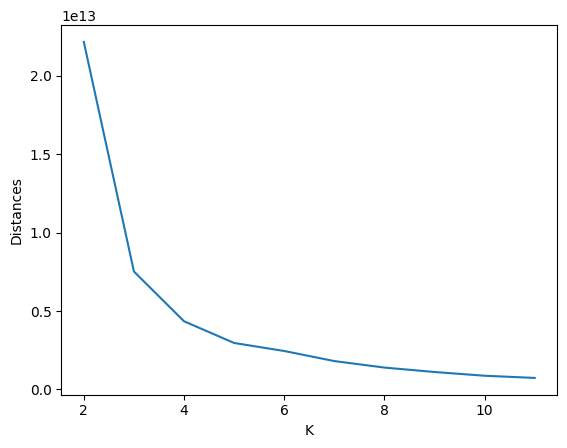

In [23]:
plt.xlabel("K")
plt.ylabel("Distances")
plt.plot(allClusters,distances)

In [24]:
model=KMeans(4)

In [25]:
model=model.fit(x)

In [26]:
guess=model.predict(x)

In [27]:
x["Cluster"]=guess

In [28]:
silhouette_score(x, guess)

0.7879018791881164

In [29]:
x["Cluster"].value_counts()

Cluster
0    15404
2     1983
1     1107
3      391
Name: count, dtype: int64

In [30]:
x1=pd.get_dummies(df,drop_first=True)

In [31]:
model1=KMeans(4)

In [32]:
model1=model1.fit(x1)

In [33]:
guess1=model1.predict(x1)

In [34]:
x1["Cluster"]=guess1

In [35]:
silhouette_score(x1, guess1)

0.7863336572483232

In [36]:
x1["Cluster"].value_counts()

Cluster
0    15357
3     2001
2     1136
1      391
Name: count, dtype: int64

In [37]:
from yellowbrick.cluster import KElbowVisualizer

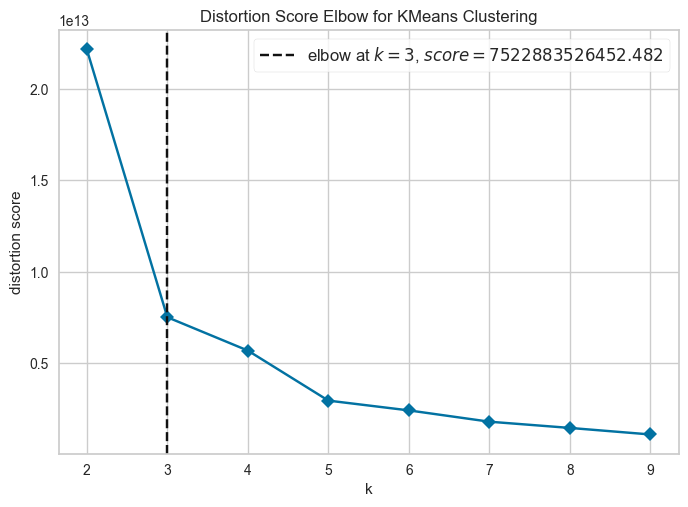

In [38]:
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)
visualizer.fit(x)  
visualizer.show();

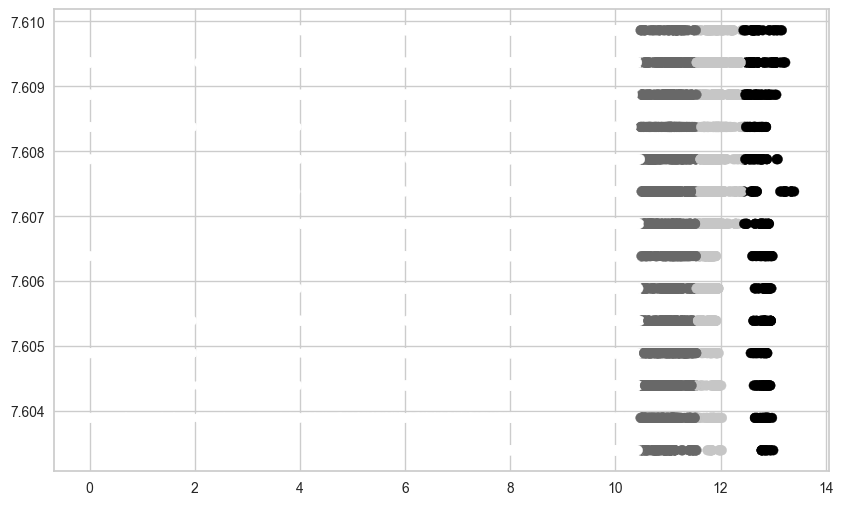

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(np.log(x['Passenger Count']), np.log(x['Activity Year']), c=guess)

# Hierarchical Clustering

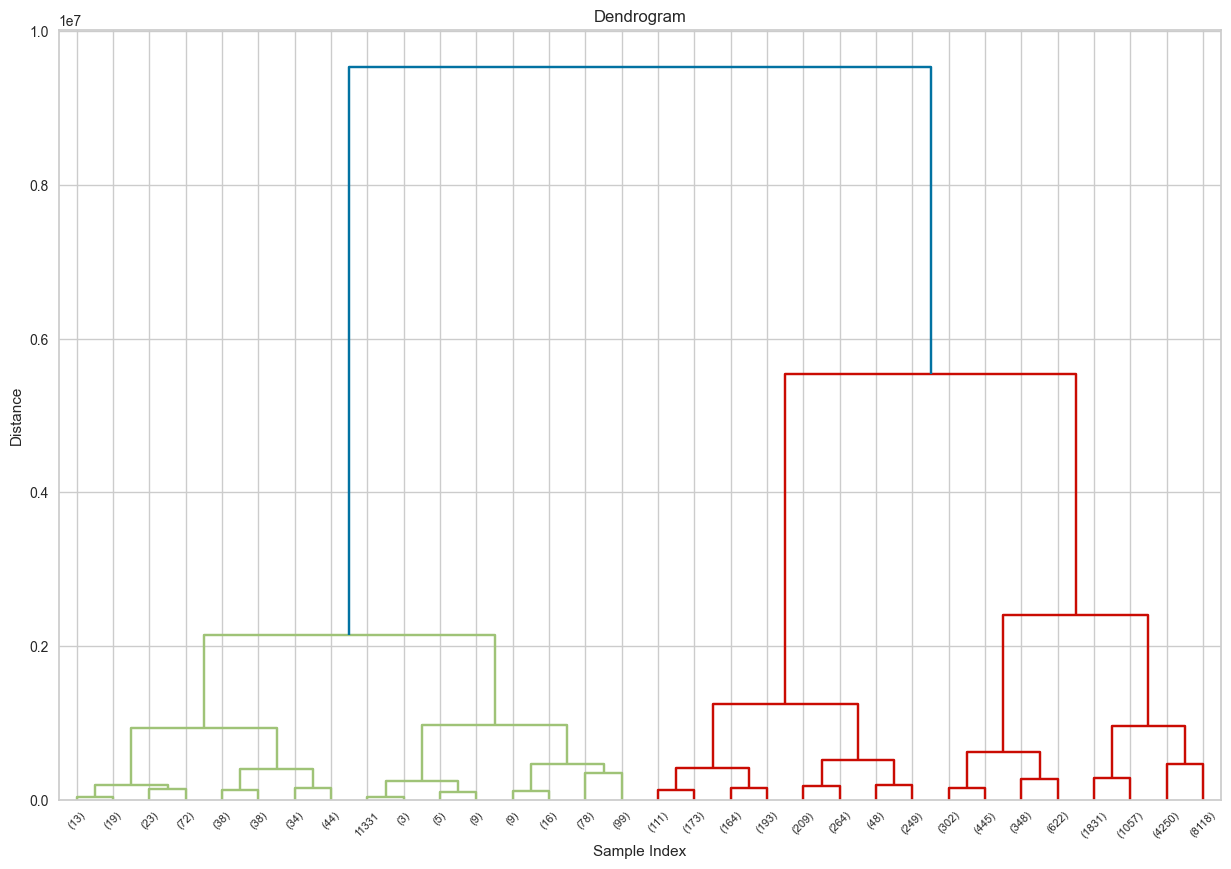

In [40]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

data=linkage(x, method='ward', metric='euclidean')

plt.figure(figsize=(15, 10))

# Dendrogram oluştur
dendrogram(data, truncate_mode='level', p=4)  # p: Kümeleme sayısı
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [45]:
x["Operating Airline"]=df["Operating Airline"]

In [46]:
x[x['Cluster']==0]

Passenger Count  Activity Year  Cluster  \
0                27271           2005        0   
1                29131           2005        0   
2                 5415           2005        0   
3                35156           2005        0   
4                34090           2005        0   
5                 6263           2005        0   
6                 5500           2005        0   
7                12050           2005        0   
8                11638           2005        0   
9                 4998           2005        0   
10                4962           2005        0   
11                8055           2005        0   
12                7984           2005        0   
15                3678           2005        0   
16                7977           2005        0   
17                8837           2005        0   
18                6969           2005        0   
19               10046           2005        0   
20                2266           2005        0   
21                6545           2005        0   
22                6094           2005        0   
25                5493           2005        0   
26                5213           2005        0   
27                5041           2005        0   
28                4744           2005        0   
29                1552           2005        0   
30                1484           2005        0   
31                 325           2005        0   
32                 545           2005        0   
33               20632           2005        0   
34               21686           2005        0   
35               11010           2005        0   
36                9628           2005        0   
37               13638           2005        0   
38               11255           2005        0   
41               14142           2005        0   
42               12132           2005        0   
43               19234           2005        0   
44               18368           2005        0   
45                7579           2005        0   
46                7658           2005        0   
47                5284           2005        0   
48                5257           2005        0   
49                4540           2005        0   
50                4341           2005        0   
51               10843           2005        0   
52               10967           2005        0   
53                9195           2005        0   
54                9086           2005        0   
55                9978           2005        0   
56                9587           2005        0   
57                6153           2005        0   
58                5646           2005        0   
59               22389           2005        0   
60               20511           2005        0   
61                2636           2005        0   
62                2535           2005        0   
63                7751           2005        0   
64                7845           2005        0   
65                1797           2005        0   
66                3238           2005        0   
69                7229           2005        0   
70                6554           2005        0   
71               12828           2005        0   
72               10269           2005        0   
73               19211           2005        0   
74               17462           2005        0   
75                7262           2005        0   
76                6586           2005        0   
79                3688           2005        0   
80                3633           2005        0   
81                4827           2005        0   
82                4784           2005        0   
83                6324           2005        0   
84                7031           2005        0   
95               11388           2005        0   
98                3953           2005        0   
99                8603           2005        0   
100               8234           2005        0   
101    

In [47]:
x.groupby('Cluster')['Operating Airline'].unique()

Cluster
0    [ATA Airlines, Air Canada, Air China, Air Fran...
1    [American Airlines, SkyWest Airlines, Southwes...
2    [Alaska Airlines, Delta Air Lines, Northwest A...
3    [United Airlines - Pre 07/01/2013, United Airl...
Name: Operating Airline, dtype: object